Mean of sample means: 0.5002
Theoretical mean: 0.5000
Std of sample means: 0.0529
Theoretical std (SE): 0.0527


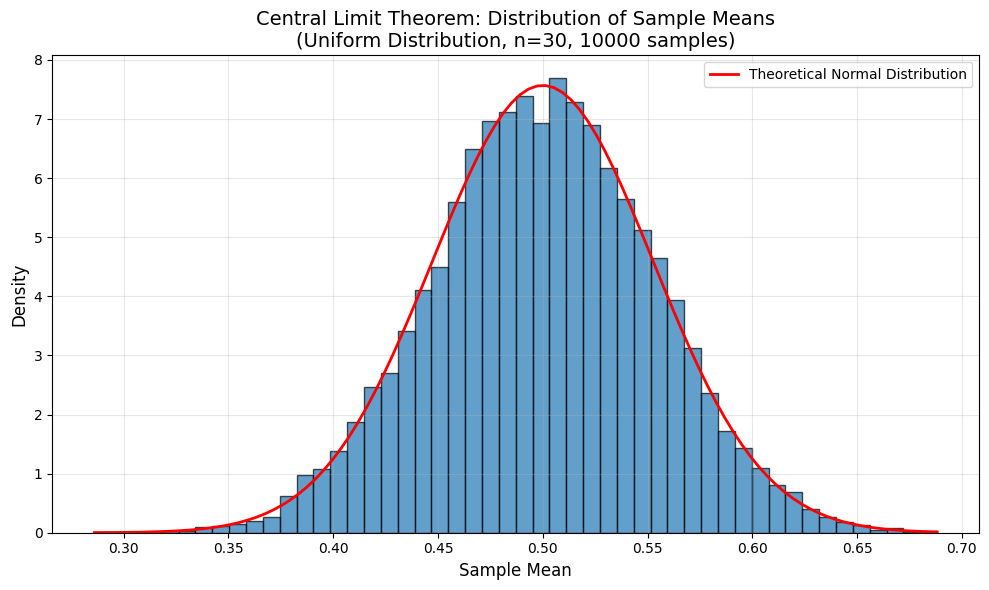

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

# Parameters
num_samples = 10000  # Number of samples to take
sample_size = 30     # Size of each sample
a, b = 0, 1          # Uniform distribution parameters [a, b)

# Generate samples and calculate means
sample_means = []
for _ in range(num_samples):
    # Draw a sample from uniform distribution
    sample = uniform.rvs(loc=a, scale=b-a, size=sample_size)
    sample_means.append(np.mean(sample))

# Convert to numpy array for easier calculations
sample_means = np.array(sample_means)

# Plot histogram of sample means
plt.figure(figsize=(10, 6))
plt.hist(sample_means, bins=50, density=True, alpha=0.7, edgecolor='black')

# Theoretical normal distribution (CLT prediction)
# Mean of uniform(a,b) = (a+b)/2
# Variance of uniform(a,b) = (b-a)^2/12
# Standard error = sqrt(variance/sample_size)
theoretical_mean = (a + b) / 2
theoretical_std = np.sqrt((b - a)**2 / 12 / sample_size)

# Overlay theoretical normal distribution
x = np.linspace(sample_means.min(), sample_means.max(), 100)
from scipy.stats import norm
plt.plot(x, norm.pdf(x, theoretical_mean, theoretical_std), 
         'r-', linewidth=2, label='Theoretical Normal Distribution')

plt.xlabel('Sample Mean', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title(f'Central Limit Theorem: Distribution of Sample Means\n'
          f'(Uniform Distribution, n={sample_size}, {num_samples} samples)', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

# Print statistics
print(f"Mean of sample means: {sample_means.mean():.4f}")
print(f"Theoretical mean: {theoretical_mean:.4f}")
print(f"Std of sample means: {sample_means.std():.4f}")
print(f"Theoretical std (SE): {theoretical_std:.4f}")

plt.tight_layout()
plt.show()



---

# 📈 Variance of a Uniform Distribution

Let’s use the **shortcut variance formula** exactly the way it’s taught in probability courses to derive the variance of a uniform distribution:

$$
\operatorname{Var}(X) = \mathbb{E}[X^2] - (\mathbb{E}[X])^2.
$$

For a uniform distribution on $[a,b]$, this derivation is surprisingly elegant.

---

# 🎯 Step 1 — Compute the mean  
For $X \sim \text{Uniform}(a,b)$, the density is:

$$
f(x) = \frac{1}{b-a}, \quad a \le x \le b.
$$

The mean is:

$$
\mathbb{E}[X] = \int_a^b x \cdot \frac{1}{b-a}\, dx.
$$

Compute the integral:

$$
\mathbb{E}[X] = \frac{1}{b-a} \left[ \frac{x^2}{2} \right]_{a}^{b}
= \frac{1}{b-a} \left( \frac{b^2 - a^2}{2} \right).
$$

Factor the numerator:

$$
b^2 - a^2 = (b-a)(b+a).
$$

So:

$$
\mathbb{E}[X] = \frac{(b-a)(b+a)}{2(b-a)} = \frac{a+b}{2}.
$$

---

# 🎯 Step 2 — Compute $\mathbb{E}[X^2]$

$$
\mathbb{E}[X^2] = \int_a^b x^2 \cdot \frac{1}{b-a}\, dx.
$$

Compute the integral:

$$
\mathbb{E}[X^2] = \frac{1}{b-a} \left[ \frac{x^3}{3} \right]_{a}^{b}
= \frac{1}{b-a} \left( \frac{b^3 - a^3}{3} \right).
$$

Factor the numerator:

$$
b^3 - a^3 = (b-a)(b^2 + ab + a^2).
$$

So:

$$
\mathbb{E}[X^2]
= \frac{(b-a)(b^2 + ab + a^2)}{3(b-a)}
= \frac{b^2 + ab + a^2}{3}.
$$

---

# 🎯 Step 3 — Apply the shortcut variance formula  
$$
\operatorname{Var}(X)
= \mathbb{E}[X^2] - (\mathbb{E}[X])^2.
$$

Plug in the pieces:

$$
\operatorname{Var}(X)
= \frac{b^2 + ab + a^2}{3}
- \left( \frac{a+b}{2} \right)^2.
$$

Expand the square:

$$
\left( \frac{a+b}{2} \right)^2
= \frac{a^2 + 2ab + b^2}{4}.
$$

Now subtract:

$$
\operatorname{Var}(X)
= \frac{b^2 + ab + a^2}{3}
- \frac{a^2 + 2ab + b^2}{4}.
$$

Put everything over a common denominator $12$:

$$
\operatorname{Var}(X)
= \frac{4(b^2 + ab + a^2) - 3(a^2 + 2ab + b^2)}{12}.
$$

Expand the numerator:

- $4(b^2 + ab + a^2) = 4b^2 + 4ab + 4a^2$
- $3(a^2 + 2ab + b^2) = 3a^2 + 6ab + 3b^2$

Subtract:

$$
4b^2 - 3b^2 = b^2
$$
$$
4ab - 6ab = -2ab
$$
$$
4a^2 - 3a^2 = a^2
$$

So the numerator becomes:

$$
b^2 - 2ab + a^2 = (b-a)^2.
$$

Thus:

$$
\operatorname{Var}(X) = \frac{(b-a)^2}{12}.
$$

---

# 🌟 Final Result  
$$
\boxed{\operatorname{Var}(X) = \frac{(b-a)^2}{12}}
$$

Now you’ve seen the full derivation using the shortcut variance identity.


---

# 🎯 What is Standard error?
- **Standard deviation** measures how spread out *individual data points* are.  
- **Standard error** measures how spread out *sample means* are.

They sound similar because they’re built from the same ingredients, but they answer different questions.

---

# 📌 Standard Deviation (SD)  
This is what you already know:

$$
\text{SD} = \sqrt{\text{Var}(X)}.
$$

It describes the variability of **one draw** from the distribution.

Example:  
If $X \sim \text{Uniform}(a,b)$, then

$$
\text{SD} = \frac{b-a}{\sqrt{12}}.
$$

---

# 📌 Standard Error (SE)  
This is the variability of the **sample mean**:

$$
\bar{X}_n = \frac{1}{n}\sum_{i=1}^n X_i.
$$

The standard error is:

$$
\text{SE} = \sqrt{\text{Var}(\bar{X}_n)}.
$$

And because of a key fact:

$$
\text{Var}(\bar{X}_n) = \frac{\text{Var}(X)}{n},
$$

we get:

$$
\text{SE} = \frac{\text{SD}}{\sqrt{n}}.
$$

This is exactly the formula you wrote:

$$
\text{SE} = \sqrt{\frac{\text{Var}(X)}{n}}.
$$

---

# 🌱 Why does this matter?

Because the **Central Limit Theorem** is about the distribution of the sample mean.

The CLT says:

$$
\frac{\bar{X}_n - \mu}{\text{SE}} \;\to\; N(0,1).
$$

So the standard error is the natural scaling factor that makes the sample mean converge to a normal distribution.

---

# 🌟 Intuition in one sentence  
- **Standard deviation**: how noisy individual observations are.  
- **Standard error**: how noisy the *average* of $n$ observations is.

As $n$ grows, the average becomes more stable, so the standard error shrinks.

---

# 🧠 A quick analogy  
Imagine measuring the weight of a grain of rice:

- One grain varies a lot → **high SD**  
- The average weight of 1,000 grains barely varies → **small SE**

Same distribution, different question.

---

# 📝 Note
The SE appears naturally when you derive the CLT using MGFs — it’s exactly the $\sigma/\sqrt{n}$ term that shows up in the normalization.